# [실습01]MLP-학습

### 휴먼지능정보공학과 201910841 최다경


### 1. 라이브러리 임포트

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 1. MNIST tain,test dataset 가져오기

In [2]:
#"":현재 폴더에 MINST있다는 의미
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), target_transform=None, download=True) #train용
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=True) #test용

## 2. 대략적인 데이터 형태

mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태: torch.Size([1, 28, 28])
label:  5


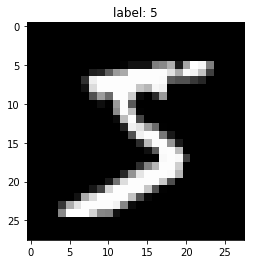

In [3]:
print "mnist_train 길이: ", len(mnist_train)
print "mnist_test 길이: ", len(mnist_test)

#데이터 하나 형태
image, label=mnist_train.__getitem__(0) #0번째 데이터
print "image data 형태:",image.size()
print "label: ", label

#그리기
img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

## 3. 데이터 로드함수
학습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [4]:
#hyper parameters
batch_size=1024
learning_rate=0.01
num_epoch=400

In [5]:
train_loader=torch.utils.data.DataLoader(mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True, num_workers=2,
                                        drop_last=True)
test_loader=torch.utils.data.DataLoader(mnist_test,
                                        batch_size=batch_size,
                                        shuffle=False, num_workers=2,
                                        drop_last=True)

데이터 로드함수 이해하기

[0]
한 번에 로드되는 데이터 크기: 1024


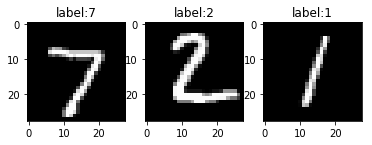

[1]
한 번에 로드되는 데이터 크기: 1024


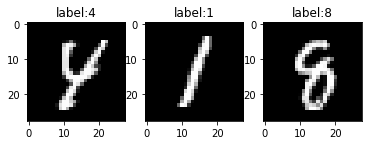

[2]
한 번에 로드되는 데이터 크기: 1024


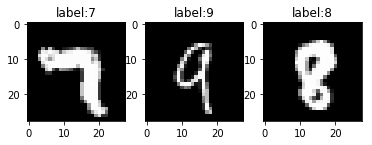

[3]
한 번에 로드되는 데이터 크기: 1024


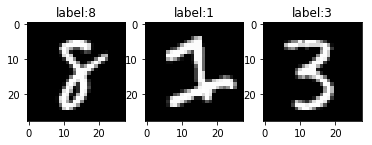

[4]
한 번에 로드되는 데이터 크기: 1024


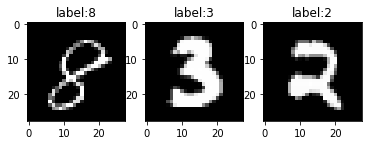

[5]
한 번에 로드되는 데이터 크기: 1024


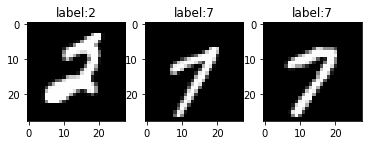

In [6]:
n=3
for i,[imgs,labels] in enumerate(test_loader):
    if i>5:
        break
        
    print "[%d]" %i 
    print "한 번에 로드되는 데이터 크기:",len(imgs)
    
    #그리기
    for j in range(n):
        img=imgs[j].numpy() #imgae타입을 numpy로 변환 
        img=img.reshape((img.shape[1],img.shape[2])) #(1,28,28) -> (28,28)
        
        plt.subplot(1,n,j+1) #(1,3)형태 플랏의 j번째 자리에 그리겠다
        plt.imshow(img,cmap='gray')
        plt.title("label:%d" %labels[j])
    plt.show()
        

## 4. 모델 선언 

In [7]:
#모델 선언
#*퍼셉트론(2 hidden layer)*

model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)
#파라미터보기
#print(list(model.parameters()))

In [8]:
def ComputeAccr(dloader,imodel):
    correct=0
    total=0
    
    for j, [imgs,labels] in enumerate(dloader):
        img=imgs #x
        label=Variable(labels) #y
        
        #(batch_size,1,28,28) -> (batch_size,28,28)
        img=img.reshape((img.shape[0],img.shape[2], img.shape[3]))
    
        #(batch_size,28,28) -> (batch_size,28*28)
        img=img.reshape((img.shape[0],img.shape[1]*img.shape[2]))
        img=Variable(img,requires_grad=False)
    
        output=imodel(img)
        _,output_index=torch.max(output,1)
    
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))
    

In [9]:
ComputeAccr(test_loader,model)

Accuracy of Test Data: 12.0876731873


## 5. loss, optimizer

In [10]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## 6.학습

In [11]:
num_epoch=400
for i in range(num_epoch):
    for j, [imgs,labels] in enumerate(train_loader): #batch_size만큼
        img=imgs #(batch_size,1,28,28)
        label=Variable(labels) #(batch_size)
        
        #(batch_size,1,28,28) -> (batch_size,28,28)
        img=img.reshape((img.shape[0],img.shape[2], img.shape[3]))
    
        #(batch_size,28,28) -> (batch_size,28*28)
        img=img.reshape((img.shape[0],img.shape[1]*img.shape[2]))
        img=Variable(img,requires_grad=True)
        
        optimizer.zero_grad()
        output=model(img) #forward prop
        loss=loss_func(output,label)
        
        loss.backward() #back prop
        optimizer.step()
        
        
        
    if i%50==0:
        print("%d.." %i)
        ComputeAccr(test_loader,model)
        print loss

0..
Accuracy of Test Data: 16.5907115936
tensor(2.2926, grad_fn=<NllLossBackward>)
50..
Accuracy of Test Data: 82.1831588745
tensor(0.6717, grad_fn=<NllLossBackward>)
100..
Accuracy of Test Data: 88.389755249
tensor(0.4008, grad_fn=<NllLossBackward>)
150..
Accuracy of Test Data: 89.6050338745
tensor(0.3678, grad_fn=<NllLossBackward>)
200..
Accuracy of Test Data: 90.4730911255
tensor(0.3620, grad_fn=<NllLossBackward>)
250..
Accuracy of Test Data: 91.091583252
tensor(0.3262, grad_fn=<NllLossBackward>)
300..
Accuracy of Test Data: 91.493057251
tensor(0.3268, grad_fn=<NllLossBackward>)
350..
Accuracy of Test Data: 91.818572998
tensor(0.2951, grad_fn=<NllLossBackward>)


## 7. 테스트

In [12]:
ComputeAccr(test_loader,model)

Accuracy of Test Data: 91.9921875


## 8. 학습된 파라미터 저장

In [ ]:
netname='./ex_1/mlp_weight.pkl'